<a href="https://colab.research.google.com/github/parth-gz/Data-Science/blob/main/17%20-%20Hypothesis%20Testing/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats

In [4]:
from statsmodels.stats import descriptivestats as sd
#provides descriptive statistics tools
from statsmodels.stats.weightstats import ztest
#Used for conducting z tests on datasets

### 1-sample sign test

In [37]:
# whenever there is a single sample and data is not normal
marks=pd.read_csv('Signtest.csv')
marks.head()

,Scores
0,60
1,75
2,90
3,99
4,98


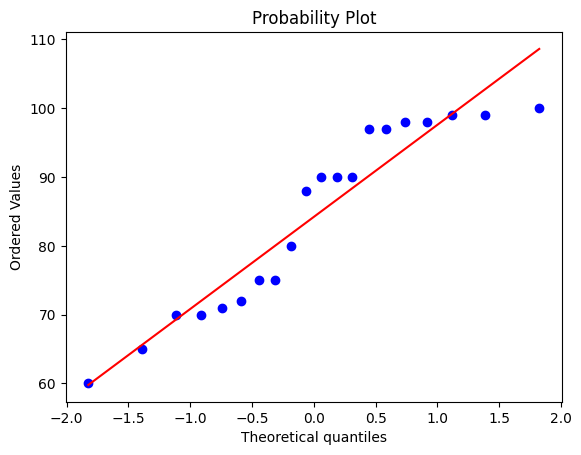

In [10]:
# Normal QQ plot
import pylab
stats.probplot(marks.Scores,dist='norm',plot=pylab)
#creates a QQ plot to visually check if the data follows a normal distribution
pylab.show()

In [13]:
#Test for normality
stats.shapiro(marks.Scores) #Outputs a test statistic and p-value
#performs the Shapiro-Wilk test for normality
#H0: The data is normally distributed
#H1: The data is not normally distributed

ShapiroResult(statistic=0.8875984049096806, pvalue=0.024299306804881928)

In [ ]:
#p value is 0.0242993068<0.05, data is not normal

In [14]:
#Descriptive statistics
print(marks.Scores.describe())

count     20.00000
mean      84.20000
std       13.33614
min       60.00000
25%       71.75000
50%       89.00000
75%       97.25000
max      100.00000
Name: Scores, dtype: float64


In [15]:
#mean=84.2 and median=89.00

In [16]:
#1 sample sign test
sign_test_results=sd.sign_test(marks.Scores, mu0=marks.Scores.mean())
print("Sign test results: ",sign_test_results)

Sign test results:  (1.0, 0.8238029479980469)


In [24]:
#p-value=0.824
#Interpretation
#H0: The median of scores is equal to the mean or scores
#H1: The median of scores is not equal to the mean or scores
#Since the p value is greater than 0.05, we fail to reject the null hypothesis
#Conclusion: The mean and median of the Scores are statistically similar
#but they are not similar as seen by Scores.decribe(), hence the test fails here

### 1-sample z-test

In [25]:
#Objective: Check if the fabric length is exactly 150 or different
fabric=pd.read_csv('Fabric_data.csv')
fabric.head()

,Fabric_length
0,151.2
1,160.3
2,147.5
3,149.2
4,159.2


In [20]:
#normality test
stats.shapiro(fabric)

ShapiroResult(statistic=0.9397524078584506, pvalue=0.1460935830606142)

In [21]:
#p-value is 0.146>0.05
fabric_mean=fabric.mean()
print(fabric_mean)

Fabric_length    155.064
dtype: float64


In [22]:
#Z-test
ztest_result, pvalue=ztest(fabric['Fabric_length'],value=150)
print("Z-test results: ",ztest_result,"\np-value: ",pvalue)

Z-test results:  4.488987748287781 
p-value:  7.156241255356764e-06


In [26]:
#H0:The mean of Fabric length is exactly 150
#H1:The mean of Fabric length not is exactly 150
#p-value is 7.156x10^-6<0.05
#reject the null hypothesis
#Hence The mean of Fabric length not is exactly 150

### Mann-Whitney Test

In [27]:
fuel=pd.read_csv('mann_whitney_additive.csv')
fuel.head()

,Without additive,With Additive
0,12.5,16.0
1,19.0,22.0
2,15.0,18.5
3,19.5,22.5
4,12.5,15.0


In [28]:
fuel.columns=["without_additive","with_additive"]

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([12.5, 12.5, 14.5, 15. , 16. , 17. , 17.5, 19. , 19.5, 20. ])),
 (2.916974343684108, 16.35, 0.9806292464041222))

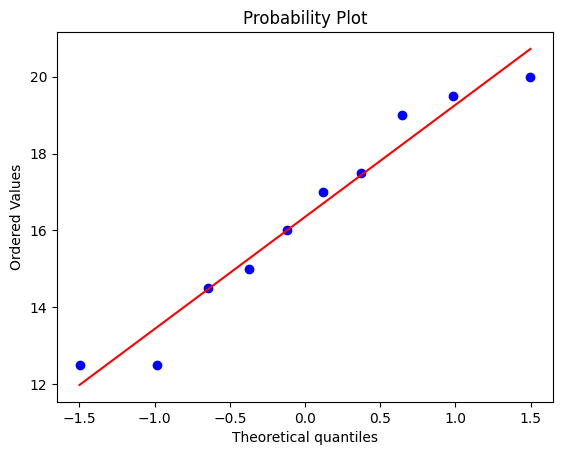

In [39]:
stats.probplot(fuel.without_additive,dist='norm',plot=pylab)

((array([-1.49876728, -0.98494667, -0.64703803, -0.37109819, -0.12121409,
          0.12121409,  0.37109819,  0.64703803,  0.98494667,  1.49876728]),
  array([13.5, 15. , 16. , 16. , 16. , 16. , 18.5, 22. , 22.5, 22.5])),
 (3.3908988801021516, 17.8, 0.9258883689473466))

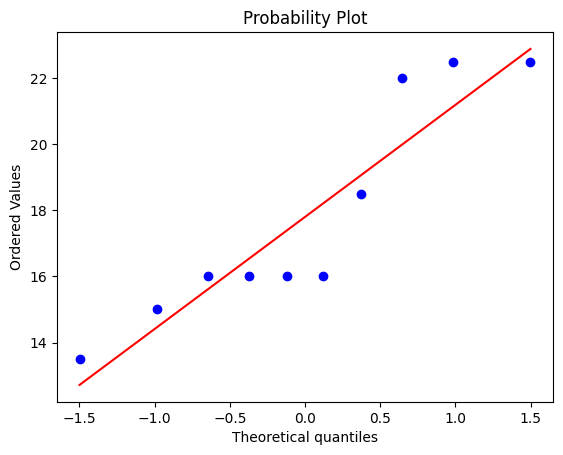

In [40]:
stats.probplot(fuel.with_additive,dist='norm',plot=pylab)

In [33]:
#H0: Data is normal
#H1: Data is not normal

In [30]:
#shapiro test
stats.shapiro(fuel.without_additive)

ShapiroResult(statistic=0.9352245458832077, pvalue=0.5011960013441327)

In [31]:
#p=0.501>0.05 : Accept H0

In [32]:
stats.shapiro(fuel.with_additive)

ShapiroResult(statistic=0.8373827516988624, pvalue=0.041048403229593605)

In [34]:
#p=0.04<0.05 : Reject H0, data is not normal

### Mann-Whitney U test

In [35]:
mannwhitney_result=stats.mannwhitneyu(fuel.without_additive,fuel.with_additive)
print("Mann-Whitney U test results: ",mannwhitney_result)

Mann-Whitney U test results:  MannwhitneyuResult(statistic=39.5, pvalue=0.4457311042015709)


In [41]:
#result: p-value=0.446>0.05
#Interpretation
#H0: No difference in performance between without_additive and with_additive
#H1: A significant difference exists
#since the p value is greater than 0.05, we fail to reject null hypothesis
#conclusion: Adding fuel additive does not significantly impact performance

### Paired T-test

In [43]:
#Objective: Check if there is difference in transaction times of supplier A and supplier B
sup=pd.read_csv('paired2.csv')
sup.head()

,SupplierA,SupplierB
0,6.15,7.15
1,6.22,7.22
2,6.76,7.76
3,4.29,5.29
4,7.08,8.08


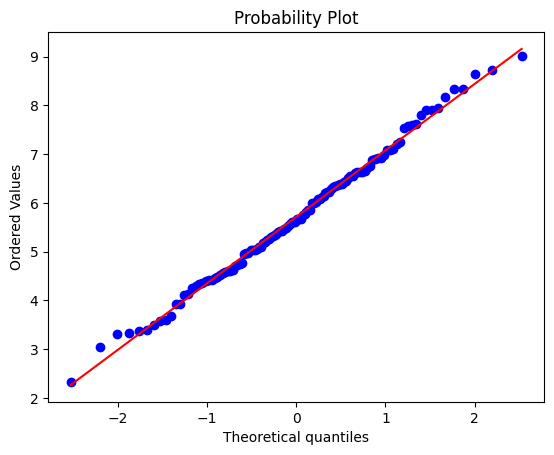

In [52]:
stats.probplot(sup.SupplierA,dist='norm',plot=pylab)
pylab.show()

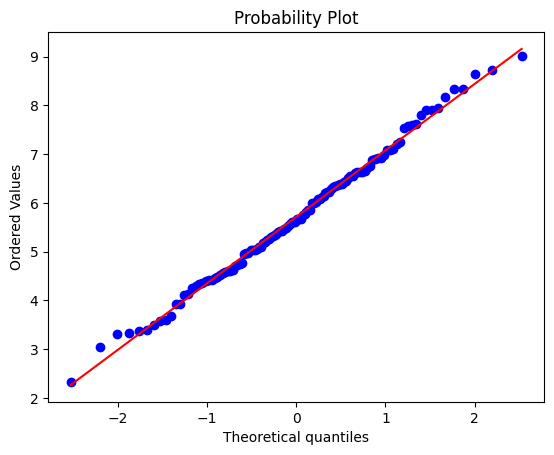

In [53]:
stats.probplot(sup.SupplierA,dist='norm',plot=pylab)
pylab.show()

In [44]:
#normality tests
stats.shapiro(sup.SupplierA)

ShapiroResult(statistic=0.9940788430927854, pvalue=0.8962103654175757)

In [47]:
#pvalue=0.896>0.05, fails to reject H0, data is normal

In [46]:
stats.shapiro(sup.SupplierB)

ShapiroResult(statistic=0.9940788430927854, pvalue=0.8962103654175757)

In [48]:
#pvalue=0.896>0.05, fails to reject H0, data is normal

In [50]:
#paired t-test
t_test_result, pvalue=stats.ttest_rel(sup['SupplierA'],sup['SupplierB'])
print("Paired T-test results: ",t_test_result,"\np-value: ",pvalue)

Paired T-test results:  -4.996833558918069e+16 
p-value:  0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Result
#p-value=0.0
#H0: there is no significant differnce between transaction times of supplier A and supplier B
#H1: There is a difference